# Assessing sales outlets' performance

## **Task**

Assess the performance of the chain's sales outlets:

- Carry out exploratory data analysis
- Assess the performance of the sales outlets
- Test statistical hypotheses
- Optional: visualize your findings

## Description of the data

The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. 

`retail_dataset_us.csv` contains:

- `purchaseId`
- `item_ID`
- `purchasedate`
- `Quantity` — the number of items in the purchase
- `CustomerID`
- `ShopID`
- `loyalty_program` — whether the customer is a member of the loyalty program

`product_codes_us.csv` contains:

- `productID`
- `price_per_one`

## Decomposition

### Define the goal
Our goal is to identify the high-performing sales outlets through data analysis. We'll identify which stores bring in the most revenue and look at whether or not the customer loyalty program has any correlation with increased sales.

We'll test the hypothesis that the loyalty program creates a statistically significant difference in revenue from customers who partake in the program.

The analysis will then be sent to the marketing department so they can be informed on whether or not their loyalty program is working, which stores are performing the worst, and how to improve moving forward.

### Exploratory data analysis
We'll do an exploratory data analysis to get a general feel for the data. This includes looking at the general information for each data set, looking at descriptive statistics, plotting histograms, and looking for outliers and anomalies.


### Data preprocessing
After getting an initial feel for the data by importing and viewing general information and descriptive statistics, we need to preprocess the data. This will consist of the following:
- Checking for and filling missing values
- Checking for and fixing duplicates
- Changing column names if needed
- Changing data types
- Remove outliers & anomalous data

### Data analysis
Next, we'll analyze the data to achieve an actionable recommendations. First, we need to merge the two data sets. Then we'll plot graphs for sales revenue by store. We'll then group the data into two groups - purchases from member in the loyalty program, and purchases from members NOT in the loyalty program. We'll look at average revenue per customer in each group and form hypotheses based on the new insights

### Hypothesis testing
We'll test the hypothesis surrounding the effectiveness of the loyalty program based on the data from the analysis using a simple p-test. This will determine if the loyalty program significantly impacts revenue or average item quantity per purchase

### Conclusions & Recommendations
Finally, we can use our findings to form conclusions and make recommendations to our marketing department. 

## Step 1: Import libraries & general data overview

In [1]:
# import libraries for analysis & visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# read data from .csv files

try:
    product_codes = pd.read_csv('product_codes_us.csv', sep=';')
except:
    product_codes = pd.read_csv('/datasets/product_codes_us.csv', sep=';')
    
try:
    retail_data = pd.read_csv('retail_dataset_us.csv', sep=',')
except:
    retail_data = pd.read_csv('/datasets/retail_dataset_us.csv', sep=',')

In [3]:
# general overview of new DataFrames

dfs = [product_codes, retail_data]

for df in dfs:
    display(df.head())
    display(df.info())

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


None

### Checking for duplicates

In [4]:
# checking for duplicates with .duplicated() method

print('There are', product_codes.duplicated().sum(), "duplicate rows in the product_codes DataFrame")
print('There are', retail_data.duplicated().sum(), "duplicate rows in the retail_data DataFrame")

There are 0 duplicate rows in the product_codes DataFrame
There are 1033 duplicate rows in the retail_data DataFrame


### Checking for missing values

In [5]:
# check for missing values with the .isna() method

display(product_codes.isna().sum())
display(retail_data.isna().sum())

productID        0
price_per_one    0
dtype: int64

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

### Conclusions
Looking at data types, we can see there are a few issues we need to fix immediately. We also need to drop duplicate rows and figure out what to do with the missing customer IDs in the retail_data DataFrame. Here's a summary of our data preprocessing tasks:
 - Change 'purchasedate' column to *datatime* data type
 - Change 'CustomerID' column to *object* data type
 - Drop duplicated rows from the retail_data DataFrame
 - Address the missing values in the 'CustomerID' column

## Step 2: Data preprocessing

### Fixing duplicates

In [6]:
# drop duplicates from the retail_data DataFrame

retail_data.drop_duplicates(inplace=True)
print('There are', retail_data.duplicated().sum(), "duplicate rows in the retail_data DataFrame")

There are 0 duplicate rows in the retail_data DataFrame


### Filling missing values

In [7]:
# investigating missing values in 'CustomerID' column

retail_data[retail_data['CustomerID'].isna()].head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0


In [8]:
# unique values for 'loyalty_program' where 'CustomerID' is missing

print(retail_data[retail_data['CustomerID'].isna()]['loyalty_program'].unique())

[0]


It looks like the customer ID is assigned once they sign up for the loyalty program. All of the missing values in 'CustomerID' are associated with customers who haven't yet signed up. We can assign these customers a generic customer ID to get rid of our NaN values in this column.

In [9]:
# fill NaN values with 0 placeholder

retail_data['CustomerID'].fillna(0.0, inplace=True)

### Changing data types

In [10]:
# change 'purchasedate' to datetime & 'CustomerID' to string

retail_data['purchasedate'] = retail_data['purchasedate'].astype('datetime64')
retail_data['CustomerID'] = retail_data['CustomerID'].astype('int').astype(str)

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_ID          104302 non-null  object        
 2   Quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   CustomerID       104302 non-null  object        
 5   loyalty_program  104302 non-null  int64         
 6   ShopID           104302 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.4+ MB


## Step 3: Exploratory data analysis

### Descriptive statistics

In [11]:
# show summary statistics for numerical columns

display(product_codes.describe())
display(retail_data.describe())

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


,Quantity,loyalty_program
count,104302.000000,104302.000000
mean,7.883003,0.224464
std,329.565540,0.417231
min,-74216.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,74214.000000,1.000000


#### Conclusion

It looks like there may be some outliers in the 'price_per_one' column. The mean unit price is around 3, and the maximum is 175. There are also products that have 0 price, which is strange. We shouldn't filter out the outliers here though because there will always be items that are much more expensive. This is a typical finding for prices of items in a store.

In the 'Quantity' column, the min and max need to be investigated further, though. Maybe negative values were items that were returned, or the order was an error.

### Histogram of product costs per unit

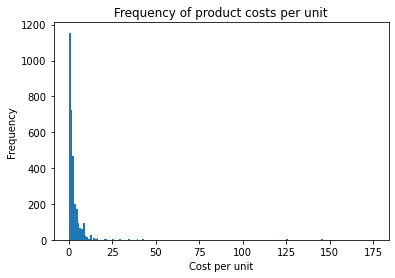

In [12]:
# histogram of product costs per unit

plt.hist(product_codes['price_per_one'], bins=175)
plt.title('Frequency of product costs per unit')
plt.xlabel('Cost per unit')
plt.ylabel('Frequency')

plt.show()

#### Conclusions
It appears as if there are some extreme outliers in this data set. Most products have a unit cost that's less than 25.00. This seems reasonable, however, since we can expect some items to be very expensive. We can leave this data alone.

### Histogram of order quantities

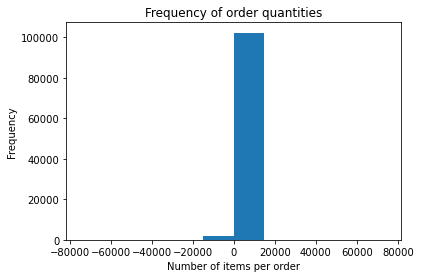

In [13]:
# histogram of order quantities

plt.hist(retail_data['Quantity'], bins=10)
plt.title('Frequency of order quantities')
plt.xlabel('Number of items per order')
plt.ylabel('Frequency')

plt.show()

In [14]:
# investigating negative order quantities & outliers

retail_data.query('Quantity <= 0').head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20
6,540468,22189,0,2017-01-07 13:55:00,0,0,Shop 0


In [15]:
# remove 0 and negative order quantities

retail_data = retail_data.query('Quantity > 0')

In [16]:
# function for removing outliers

def remove_outliers(df, column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    good_data_rows = df.query('@column <= (1.5 * @IQR) + @Q3')    
    good_data = pd.DataFrame()   
    good_data = good_data.append(good_data_rows)
    
    return good_data

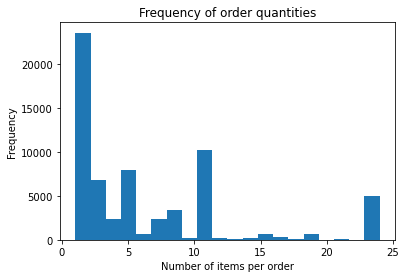

In [17]:
# filter outliers in 'Quanitity' column

retail_data = remove_outliers(retail_data, retail_data['Quantity'])

plt.hist(retail_data['Quantity'], bins=20)
plt.title('Frequency of order quantities')
plt.xlabel('Number of items per order')
plt.ylabel('Frequency')

plt.show()

#### Conclusions
We filtered out orders with negative and 0 values for 'Quantity' since this data didn't make much sense. We also filtered out the outliers which were determined to be any orders with over 25 items.

### Histogram of purchase dates

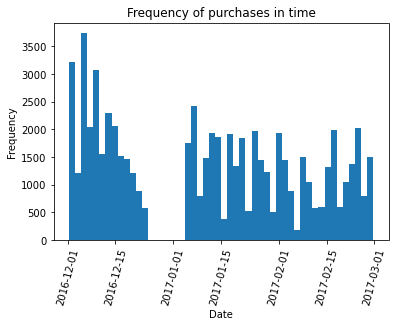

In [18]:
# plot histogram of 'purchasedate' column

plt.hist(retail_data['purchasedate'], bins=50)
plt.title('Frequency of purchases in time')
plt.xlabel('Date')
plt.xticks(rotation=75)
plt.ylabel('Frequency')

plt.show()

#### Conclusions

Nothing strange here, except there are a few dates where there were no purchases made. Maybe this was during times the store was closed, during a natural disaster, or during a long holiday. Either way, this anomaly isn't too important to our data analysis and we can leave it alone.

## Step 4: Data analysis

### Identifying high-performing outlets

In [19]:
# merge cost & quantity data

product_codes.columns = ['item_ID', 'price_per_one']

all_data = pd.merge(retail_data, product_codes, on='item_ID')
all_data['purchase_revenue'] = all_data['Quantity'] * all_data['price_per_one']
all_data.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,price_per_one,purchase_revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,0.42,4.62
1,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,0.42,0.42
2,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,0.42,0.84
3,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,0.42,0.42
4,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,0.42,4.62


In [20]:
# group revenue sums by shop ID

outlet_revenues = all_data.groupby('ShopID')['purchase_revenue'].sum()
outlet_revenues = outlet_revenues.sort_values(ascending=False).reset_index()
outlet_revenues.head(10)

,ShopID,purchase_revenue
0,Shop 0,85587.09
1,Shop 13,20612.16
2,Shop 28,20312.48
3,Shop 15,20157.92
4,Shop 20,19896.63
5,Shop 9,18373.45
6,Shop 22,18269.07
7,Shop 11,18257.86
8,Shop 10,18003.47
9,Shop 4,17642.38


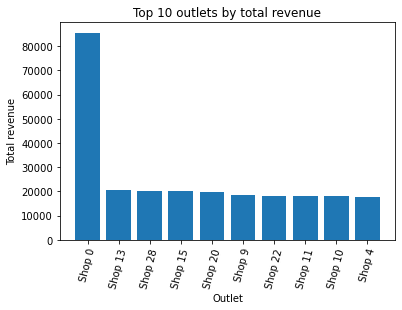

In [21]:
plt.bar(x=outlet_revenues['ShopID'][:10], height=outlet_revenues['purchase_revenue'][:10])
plt.title('Top 10 outlets by total revenue')
plt.xlabel('Outlet')
plt.xticks(rotation=75)
plt.ylabel('Total revenue')

plt.show()

#### Conclusions
Shop 0 is the winner here by a long shot, with roughly 4 times the revenue as the next-highest performer in terms of revenue. We should determine what it is that makes this shop so profitable, and attempt to mimic these properties in the other stores.

### Features of high-performing outlets

In [22]:
# summary statistics for each outlet

agg_data = all_data.groupby('ShopID').agg(purchase_cnt=('purchaseid', 'count'),
                                          avg_qty=('Quantity', 'mean'),
                                          unique_customers=('CustomerID', 'nunique'),
                                          percent_loyal=('loyalty_program', 'mean'),
                                          avg_unit_price=('price_per_one', 'mean'))
agg_data.head(10)

,purchase_cnt,avg_qty,unique_customers,percent_loyal,avg_unit_price
ShopID,,,,,
Shop 0,17211,3.756377,109,0.037186,1.561020
Shop 1,1858,6.687298,104,0.383746,1.933504
Shop 10,1564,7.677749,88,0.280691,2.344885
Shop 11,1770,8.048588,111,0.407345,1.813175
Shop 12,1293,7.622583,89,0.306265,2.072993
Shop 13,1672,7.250000,99,0.363636,2.269653
Shop 14,1731,6.753899,109,0.291161,2.131103
Shop 15,1880,7.953723,106,0.299468,1.953420
Shop 16,1433,7.690858,89,0.367062,1.883552


In [23]:
# find max for each

agg_data.idxmax()

purchase_cnt         Shop 0
avg_qty              Shop 4
unique_customers    Shop 11
percent_loyal        Shop 2
avg_unit_price      Shop 10
dtype: object

#### Conclusions
It's pretty clear that Shop 0 has such a high revenue simply because it hase the most purchases. We should really focus on driving more customers to the other locations since the revenue and number of purchases seem to be highly correlated.

### Correlation between revenue & customer loyalty

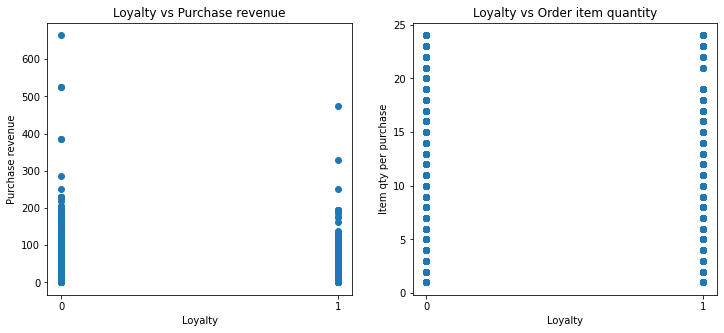

In [24]:
# scatter plots

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.reshape(-1)

axes[0].scatter(all_data['loyalty_program'], all_data['purchase_revenue'])
axes[0].set_title('Loyalty vs Purchase revenue')
axes[0].set_ylabel('Purchase revenue')
axes[0].set_xlabel('Loyalty')
axes[0].set_xticks([0, 1])


axes[1].scatter(all_data['loyalty_program'], all_data['Quantity'])
axes[1].set_title('Loyalty vs Order item quantity')
axes[1].set_ylabel('Item qty per purchase')
axes[1].set_xlabel('Loyalty')
axes[1].set_xticks([0, 1])

plt.show()

In [25]:
# Pearson correlations

all_data[['loyalty_program', 'purchase_revenue', 'Quantity']].corr()

,loyalty_program,purchase_revenue,Quantity
loyalty_program,1.000000,0.005043,0.005066
purchase_revenue,0.005043,1.000000,0.387404
Quantity,0.005066,0.387404,1.000000


#### Conclusions
It looks like there is very little correlation between customer loyalty and purchase revenue and customer loyalty and item quantity per purchase. To be sure, we'll confirm there aren't any statisitically significant differences in the next step.

## Step 5: Hypothesis testing

In [26]:
# splitting groups

non_members = all_data.query('loyalty_program == 0')
members = all_data.query('loyalty_program == 1')

### Are purchase revenues higher for members of the loyalty program?

In [27]:
# mean purchase revenues

print('Mean purchase revenue for members:', round(members['purchase_revenue'].mean(), 2))
print('Mean purchase revenue for non-members:', round(non_members['purchase_revenue'].mean(), 2))

Mean purchase revenue for members: 9.0
Mean purchase revenue for non-members: 8.84


In [28]:
# run p-test for revenues

print('Loyalty members revenue variance: {:.2f}'.format(members['purchase_revenue'].var()))
print('Non-members revenue variance: {:.2f}\n'.format(non_members['purchase_revenue'].var()))

results = st.ttest_ind(members['purchase_revenue'], non_members['purchase_revenue'], equal_var=True)

alpha = 0.05

print('Null hypothesis:\n   The loyalty program does not effect revenues from customers\n')
print('Alternative hypothesis:\n   The loyalty program increases revenues from customers\n')
print('p-value: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Loyalty members revenue variance: 182.41
Non-members revenue variance: 194.49

Null hypothesis:
   The loyalty program does not effect revenues from customers

Alternative hypothesis:
   The loyalty program increases revenues from customers

p-value:  0.09914326591249543
We can't reject the null hypothesis


#### Conclusion

We can not reject the null hupotesis since our p-value was greater than 0.05, the critical significance level. This means that it's likely that the loyalty program doesn't encourage customers to spend more. The weak correlation must be true.

### Are item quantities per purchase higher for members of the loyalty program?

In [29]:
# mean item quantities per purchase

print('Mean quantities per purchase for members:', round(members['Quantity'].mean(), 2))
print('Mean quantities per purchase for non-members:', round(non_members['Quantity'].mean(), 2))

Mean quantities per purchase for members: 6.52
Mean quantities per purchase for non-members: 6.45


In [30]:
# run p-test for item quantities per purchase

print('Loyalty members revenue variance: {:.2f}'.format(members['Quantity'].var()))
print('Non-members revenue variance: {:.2f}\n'.format(non_members['Quantity'].var()))

results = st.ttest_ind(members['Quantity'], non_members['Quantity'], equal_var=True)

alpha = 0.05

print('Null hypothesis:\n   The loyalty program does not effect item quantities per purchase\n')
print('Alternative hypothesis:\n   The loyalty program increases item quantities per purchase\n')
print('p-value: ', results.pvalue)

if (results.pvalue / 2 < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Loyalty members revenue variance: 40.21
Non-members revenue variance: 40.00

Null hypothesis:
   The loyalty program does not effect item quantities per purchase

Alternative hypothesis:
   The loyalty program increases item quantities per purchase

p-value:  0.19617326589246142
We can't reject the null hypothesis


#### Conclusion
For this test, we cannot reject the null hypothesis. This means that the difference in average item quantity per purchase between members and non-members is probably due to randomness and isn't truly significant. 

## Step 6: Conclusions & recommendations

After our initial overview and exploratory data analysis, we concluded that the data had some problems that needed to be addressed before continuing on with the analysis. Here is what we changed about the original data:
 - Changed 'purchasedate' column to *datatime* data type
 - Changed 'CustomerID' column to *object* data type
 - Dropped duplicated rows from the retail_data DataFrame
 - Addressed the missing values in the 'CustomerID' column
 - Removed purchases with 0 and negative values for 'Quantity'
 - Removed purchases with positive outliers in 'Quantity'

Through our analysis, we found that Shop 0 had the highest revenue by nearly 4x the other shops! We looked more closely at why this may be the case, and found it was simply because there were more purchases made there.

We then tested hypotheses that the loyalty program increases average revenue and items bought per purchase. We found that the loyalty program doesn't increase revenue significantly, and the average number of items bought per purchase is the same beteen members and non-members.

#### Recommendations
 - Focus on driving more customers to other locations. The only reason Shop 0 had the highest revenue was because more purchases were made there.
 - Continue to target resources towards building and improving the loyalty program. The program as-is is inneffective at increasing revenue.